In [2]:
# 导入相关依赖
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset


In [3]:
# 定义超参数
LR = 0.01
BATCH_SIZE = 64
EPOCHS = 100

In [4]:
# 下载数据集
olivetti_faces = fetch_olivetti_faces(data_home="../dataset/olivettiFaces")

In [5]:
# 加载数据
# 划分数据集
data, target = olivetti_faces.data, olivetti_faces.target
# 将数据划分为训练集和测试集， random_state=42 使用随机数种子确保代码每次运行时数据一致， stratify=olivetti_faces.target 按照target 维度对数据集进行分层采样，却表40个人的数据都会被采集到
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42, stratify=olivetti_faces.target)
# 将特征数据与目标值组合在一起
train_data_set = TensorDataset(torch.tensor(train_data, dtype = torch.float32), torch.tensor(train_target, dtype = torch.long))
test_data_set = TensorDataset(torch.tensor(test_data, dtype = torch.float32), torch.tensor(test_target, dtype = torch.long))
# 加载数据集到 DataLoader
train_loder = DataLoader(train_data_set, batch_size=64, shuffle=True)
test_loder = DataLoader(test_data_set, batch_size=64, shuffle=True)

In [6]:
# 定义模型
model = nn.Sequential(
    nn.Linear(in_features=4096, out_features=1024, bias=True),
    nn.BatchNorm1d(num_features=1024),
    nn.ReLU(),
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.BatchNorm1d(num_features=512),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=256, bias=True),
    nn.BatchNorm1d(num_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=128, bias=True),
    nn.BatchNorm1d(num_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=40, bias=True),
)

In [7]:
# 定义损失函数及优化器
# 使用交叉熵损失
loss_fun = nn.CrossEntropyLoss()
# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=LR)


epoch 0, loss 3.0383737087249756
epoch 1, loss 2.0611846446990967
epoch 2, loss 1.2300316095352173
epoch 3, loss 0.8498944044113159
epoch 4, loss 0.4531306028366089
epoch 5, loss 0.26734665036201477
epoch 6, loss 0.1245456114411354
epoch 7, loss 0.05585751682519913
epoch 8, loss 0.052620433270931244
epoch 9, loss 0.02976112626492977
epoch 10, loss 0.05118286609649658
epoch 11, loss 0.020990589633584023
epoch 12, loss 0.07494205981492996
epoch 13, loss 0.010314364917576313
epoch 14, loss 0.008771412074565887
epoch 15, loss 0.004649206530302763
epoch 16, loss 0.006535982247442007
epoch 17, loss 0.0068246484734117985
epoch 18, loss 0.018358897417783737
epoch 19, loss 0.014492511749267578
epoch 20, loss 0.007135441992431879
epoch 21, loss 0.010782163590192795
epoch 22, loss 0.004937285557389259
epoch 23, loss 0.00222766469232738
epoch 24, loss 0.1048169657588005
epoch 25, loss 0.002359879668802023
epoch 26, loss 0.0018765722634270787
epoch 27, loss 0.0023635737597942352
epoch 28, loss 0.00

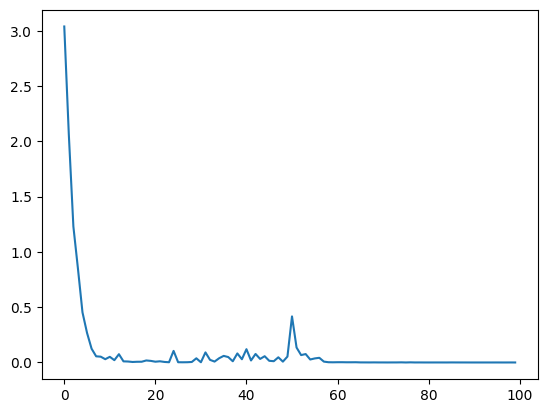

In [8]:
history_loss = []
# 开始训练
for epoch in range(EPOCHS):
    for data, target in train_loder:
        optimizer.zero_grad() # 累计梯度清零
        # 前向计算
        out = model(data)
        # 计算损失
        loss = loss_fun(out, target)
        # 反向传播计算梯度
        loss.backward()
        # 更新参数
        optimizer.step()
    history_loss.append(loss.item())
    print(f'epoch {epoch}, loss {loss.item()}')
# 绘制损失与训练轮数的变化
plt_x = range(0, EPOCHS, 1)
plt.plot(plt_x, history_loss)
plt.show()

In [10]:
# 测试
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loder:
        out = model(data)
        pred = torch.argmax(out, dim=1)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += data.shape[0]
    print(f'accuracy {100 * correct / total:.2f}%')


accuracy 96.25%
